In [8]:
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

In [12]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

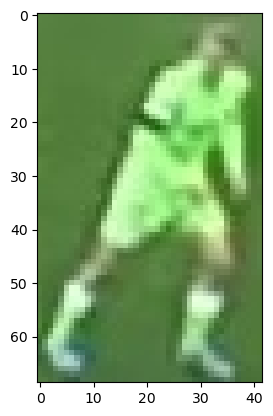

In [13]:
plt.imshow(image)
plt.show()

# Take the top half of the image

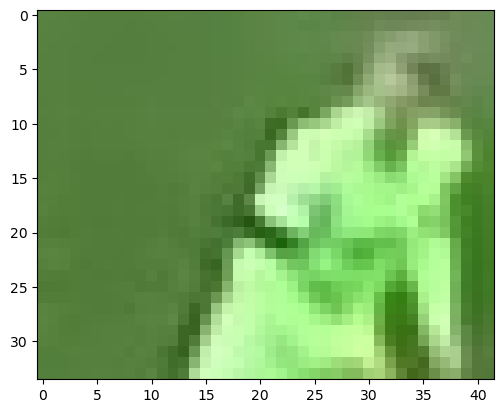

In [14]:
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

C:\Users\ap644\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


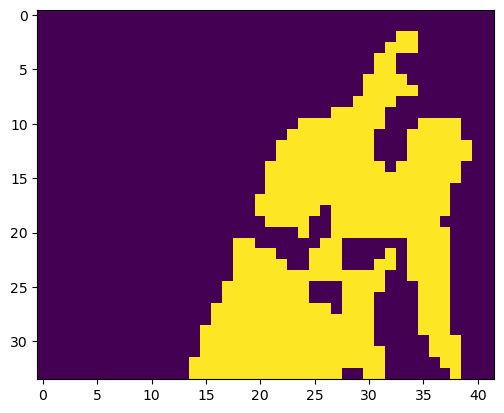

In [15]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform KMeans clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [16]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [17]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [18]:
kmeans.cluster_centers_[player_cluster]

array([169.35221675, 233.26108374, 143.66502463])